# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
# Carregando os dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


#### 1) Criando a matriz de design (e a matriz y) utilizando o Patsy

In [3]:
reg_1 = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()

In [4]:
tips['res_tip'] = reg_1.resid

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.64e-20
Time:                        19:45:47   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2) Removendo as variáveis não significantes (sex e time).

In [5]:
reg_1 = smf.ols('tip ~ smoker + net_bill', data = tips).fit()

In [6]:
tips['res_tip'] = reg_1.resid

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           4.56e-22
Time:                        19:45:48   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3) observando o gráfico de resíduos em função de net_bill

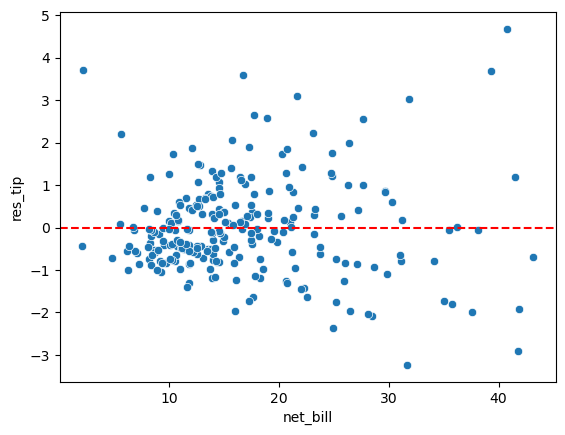

In [7]:
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

#### 4) testando transformar net_bill no log e um polinômio.

##### 4.1) net_bill no log

In [8]:
reg_1 = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()

In [9]:
tips['res_log'] = reg_1.resid

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           5.38e-19
Time:                        19:45:51   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

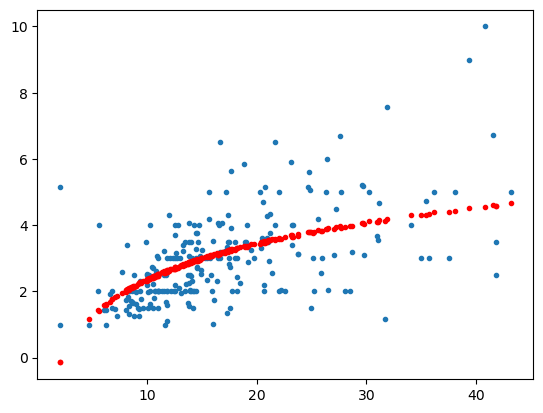

In [10]:
tips['pred_log'] = reg_1.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')

##### 4.2) net_bill num polinômio

In [11]:
reg_1 = smf.ols('tip ~ smoker + np.power(net_bill, 2)', data = tips).fit()

In [12]:
tips['res_pol'] = reg_1.resid

reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.04e-19
Time:                        19:45:53   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

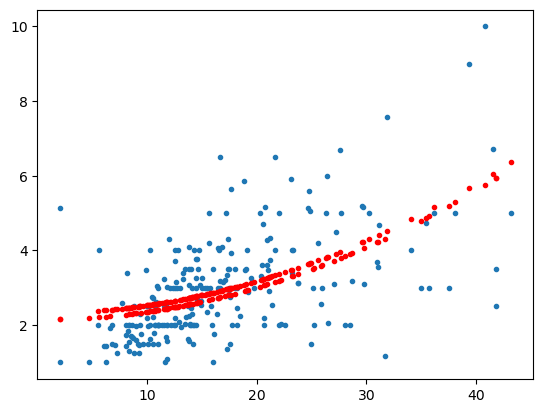

In [13]:
tips['pred_pol'] = reg_1.fittedvalues
 
plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_pol'], 'r.')

##### 4.3) Escolhendo o melhor modelo

* O **melhor modelo** é o que aplica o **polinômio**, pois apresenta maior aderência entre os valores reais e os previstos.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

#### 1) Criando a matriz de design (e a matriz y) utilizando o Patsy para um modelo no log de tip

In [14]:
reg_2 = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', data = tips).fit()

In [15]:
tips['res_log_2'] = reg_2.resid

reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.21e-18
Time:                        19:45:57   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2) Removendo as variáveis não significantes (sex e time).

In [16]:
reg_2 = smf.ols('np.log(tip) ~ smoker + net_bill', data = tips).fit()

In [17]:
tips['res_log_2'] = reg_2.resid

reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.31e-20
Time:                        19:45:58   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3) observando o gráfico de resíduos em função de net_bill

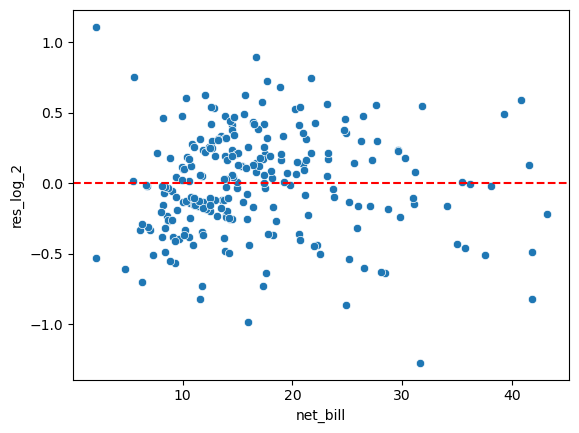

In [18]:
sns.scatterplot(x = 'net_bill', y = 'res_log_2', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

#### 4) testando transformar net_bill no log e um polinômio.

##### 4.1) net_bill no log

In [19]:
reg_2 = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', data = tips).fit()

In [20]:
tips['res_log_2'] = reg_2.resid

reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           7.20e-21
Time:                        19:46:11   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

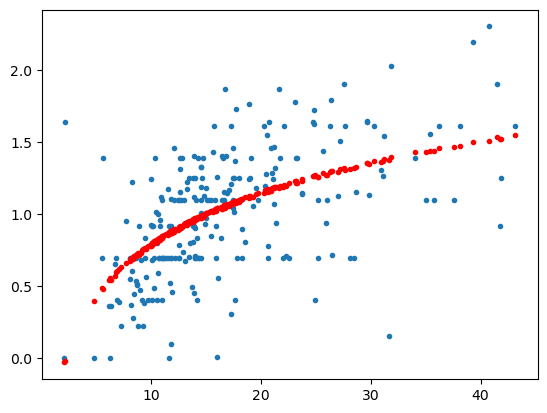

In [21]:
tips['pred_log_2'] = reg_2.fittedvalues
tips['tip_log'] = np.log(tips['tip'])
plt.plot(tips['net_bill'], tips['tip_log'], '.')
plt.plot(tips['net_bill'], tips['pred_log_2'], 'r.')

##### 4.2) net_bill num polinômio

In [22]:
reg_2 = smf.ols('np.log(tip) ~ smoker + np.power(net_bill,2)', data = tips).fit()

In [23]:
tips['res_pol_2'] = reg_2.resid

reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     40.81
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           5.45e-16
Time:                        19:46:13   Log-Likelihood:                -107.68
No. Observations:                 244   AIC:                             221.4
Df Residuals:                     241   BIC:                             231.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7562      0.048     15.764      0.000       0.662       0.851
smoker[T.No]              0.0492      0.050      0.978      0.329      -0.050       0.148
np.power(net_bill, 2)     0.0006   6.91e-05      9.034      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.759   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.801
Skew:                          -0.202   Prob(JB):                        0.406
Kurtosis:                       2.880   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

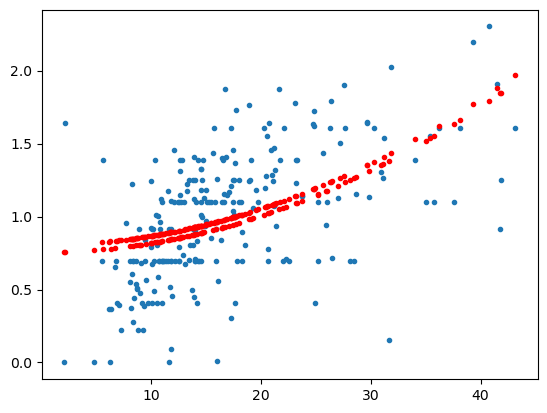

In [24]:
tips['pred_pol_2'] = reg_2.fittedvalues
tips['tip_log'] = np.log(tips['tip'])
plt.plot(tips['net_bill'], tips['tip_log'], '.')
plt.plot(tips['net_bill'], tips['pred_pol_2'], 'r.')

##### 4.3) Escolhendo o melhor modelo

* O **melhor modelo** é o que aplica o **logaritmo natural**, pois apresenta maior aderência entre os valores reais e os previstos.

##### 5) Do modelo final deste item, calculando o  $𝑅^2$ na escala de tip (sem o log)

In [25]:
reg_2 = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()

In [26]:
reg_2.rsquared

0.2946732367304479

**Observação:**
* O **modelo do item I** apresenta o melhor $R^2$.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [27]:
# Carregando a base de dados
df_renda = pd.read_csv('previsao_de_renda.csv')
df_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


##### 1) Ajustando um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa

In [28]:
reg_3 = smf.ols('np.log(renda) ~ tempo_emprego + np.power(tempo_emprego,2)', data = df_renda).fit()

In [29]:
df_renda['res_renda'] = reg_3.resid

reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     1312.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:46:25   Log-Likelihood:                -15125.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12424   BIC:                         3.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.7665      0.015    514.262      0.000       7.737       7.796
tempo_emprego                  0.0743      0.003     25.799      0.000       0.069       0.080
np.power(tempo_emprego, 2)    -0.0007   9.95e-05     -7.076      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       28.920   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.103
Skew:                           0.117   Prob(JB):                     4.79e-07
Kurtosis:                       2.961   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 2) Fazendo uma análise de resíduos

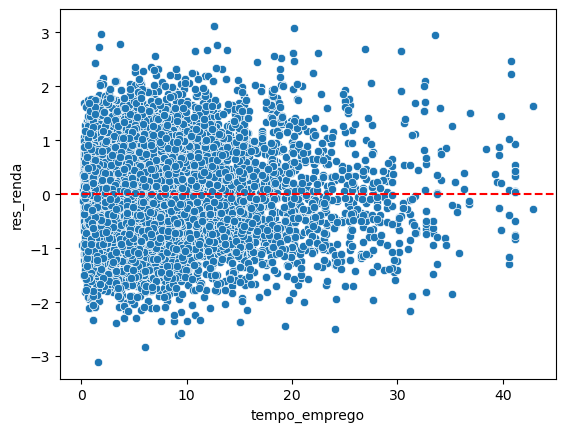

In [30]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

**Análise:**
* A regressão foi ajustada através do **polinômio "x + $x^2$"** para a variável explicativa e do **logaritmo natural** para a variável resposta.

##### 3) Ajustando um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis

In [31]:
reg_3 = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data = df_renda).fit()

In [32]:
df_renda['res_renda'] = reg_3.resid

reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:46:50   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

##### 4) Removendo as variáveis não significantes e ajustando novamente o modelo. 

In [33]:
# Configurando as colunas para ficar somente as variáveis relavantes
df = pd.get_dummies(df_renda[['tipo_renda', 'educacao']], prefix=['tipo_renda', 'educacao'])
df

,tipo_renda_Assalariado,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Primário,educacao_Pós graduação,educacao_Secundário,educacao_Superior completo,educacao_Superior incompleto
0,False,False,True,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
14995,False,False,True,False,False,False,False,True,False,False
14996,False,False,False,True,False,False,False,False,True,False
14997,True,False,False,False,False,False,False,False,True,False
14998,False,False,True,False,False,False,False,False,True,False


In [34]:
# Excluindo as colunas não representativas
df.drop(['tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Servidor público', 'educacao_Primário', 'educacao_Pós graduação', 'educacao_Superior incompleto' ], axis='columns', inplace = True)
df_renda.drop(['tipo_renda', 'educacao'], axis='columns', inplace = True)

In [35]:
# Acrescentando ao dataframe principal as colunas representativas
df_renda = pd.concat([df_renda, df], axis=1)
df_renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,res_renda,tipo_renda_Empresário,tipo_renda_Pensionista,educacao_Secundário,educacao_Superior completo
0,0,2015-01-01,15056,F,False,True,0,Solteiro,Casa,26,6.602740,1.0,8060.34,5343.503909,True,False,True,False
1,1,2015-01-01,9968,M,True,True,0,Casado,Casa,28,7.183562,2.0,1852.15,-7617.706549,False,False,False,True
2,2,2015-01-01,4312,F,True,True,0,Casado,Casa,35,0.838356,2.0,2253.89,1239.764238,True,False,False,True
3,3,2015-01-01,10639,F,False,True,1,Casado,Casa,30,4.846575,3.0,6600.77,4164.799763,False,False,False,True
4,4,2015-01-01,7064,M,True,False,0,Solteiro,Governamental,33,4.293151,1.0,6475.97,-537.788911,False,False,True,False


In [36]:
# Renomeando a coluna para adequação ao Patsy
df_renda.rename({"educacao_Superior completo": "educacao_Superior_completo"}, axis=1, inplace=True)

In [39]:
# Ajustando a variável resposta através do logaritmo natural,
# e a variável explicativa 'tempo_emprego' através do polinônio do item 1
reg_3 = smf.ols('np.log(renda) ~ sexo + posse_de_imovel + qtd_filhos + tipo_renda_Empresário + educacao_Superior_completo + estado_civil + idade + tempo_emprego + np.power(tempo_emprego,2) + qt_pessoas_residencia', data = df_renda).fit()

In [40]:
df_renda['res_renda'] = reg_3.resid

reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     534.9
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:38:48   Log-Likelihood:                -13552.
No. Observations:               12427   AIC:                         2.713e+04
Df Residuals:                   12413   BIC:                         2.724e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.4484      0.218     29.537      0.000       6.020       6.876
sexo[T.M]                              0.8015      0.014     57.922      0.000       0.774       0.829
posse_de_imovel[T.True]                0.0850      0.014      6.215      0.000       0.058       0.112
tipo_renda_Empresário[T.True]          0.1483      0.015     10.197      0.000       0.120       0.177
educacao_Superior_completo[T.True]     0.1162      0.013      8.645      0.000       0.090       0.143
estado_civil[T.Separado]               0.3320      0.111      2.991      0.003       0.114       0.550
estado_civil[T.Solteiro]               0.2823      0.109      2.596      0.009       0.069       0.495
estado_civil[T.União]                 -0.0354      0.025     -1.413      0.158      -0.085       0.014
estado_civil[T.Viúvo]                  0.3713      0.115      3.219      0.001       0.145       0.598
qtd_filhos                            -0.2741      0.108     -2.544      0.011      -0.485      -0.063
idade                                  0.0056      0.001      7.155      0.000       0.004       0.007
tempo_emprego                          0.0793      0.003     31.014      0.000       0.074       0.084
np.power(tempo_emprego, 2)            -0.0007   8.84e-05     -7.418      0.000      -0.001      -0.000
qt_pessoas_residencia                  0.3004      0.108      2.792      0.005       0.090       0.511
==============================================================================
Omnibus:                        1.362   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.364
Skew:                           0.026   Prob(JB):                        0.506
Kurtosis:                       2.997   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretando os parâmetros**
* Pelo modelo ajustado é possível identificar que a variável **'estado_civil[T.União]'** não é relevante pois está acima de 0,050 para **P**;
* Houve melhora do $R^2$, contudo o modelo explica pois mais de um terço para a variável resposta.

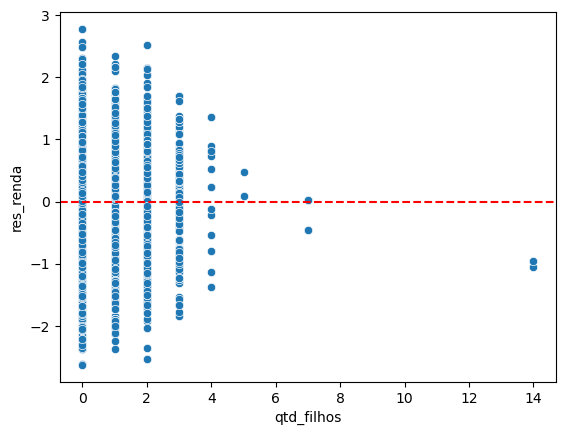

In [41]:
sns.scatterplot(x = 'qtd_filhos', y = 'res_renda', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

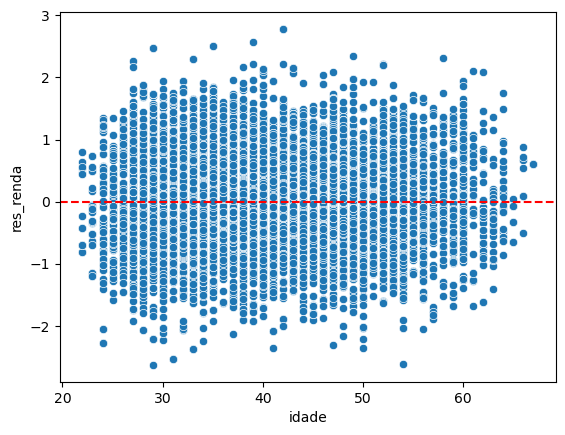

In [42]:
sns.scatterplot(x = 'idade', y = 'res_renda', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

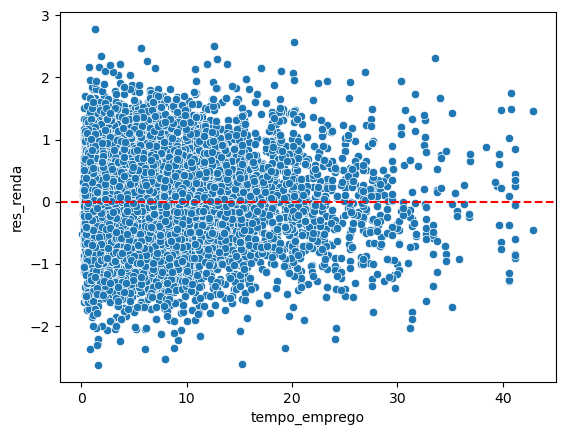

In [43]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

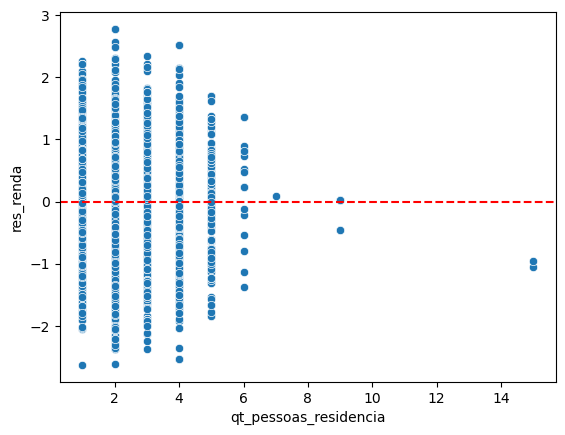

In [44]:
sns.scatterplot(x = 'qt_pessoas_residencia', y = 'res_renda', data = df_renda)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='sexo', ylabel='res_renda'>

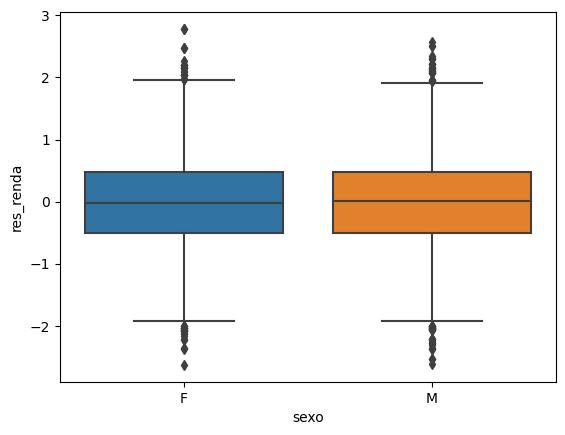

In [45]:
sns.boxplot(x = 'sexo', y = 'res_renda', data = df_renda)

<Axes: xlabel='posse_de_imovel', ylabel='res_renda'>

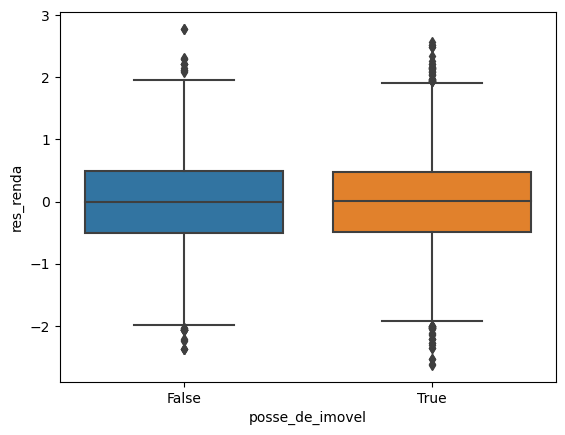

In [46]:
sns.boxplot(x = 'posse_de_imovel', y = 'res_renda', data = df_renda)

<Axes: xlabel='tipo_renda_Empresário', ylabel='res_renda'>

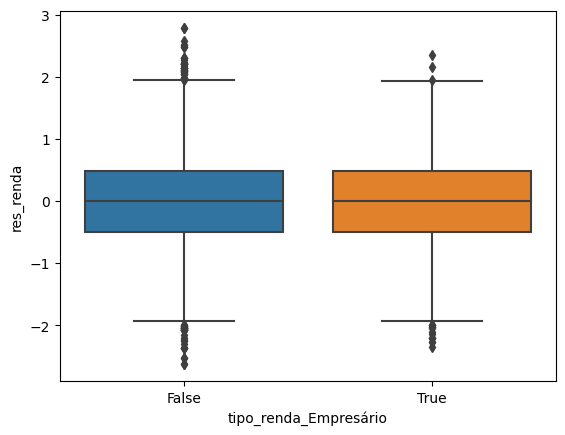

In [47]:
sns.boxplot(x = 'tipo_renda_Empresário', y = 'res_renda', data = df_renda)

<Axes: xlabel='tipo_renda_Pensionista', ylabel='res_renda'>

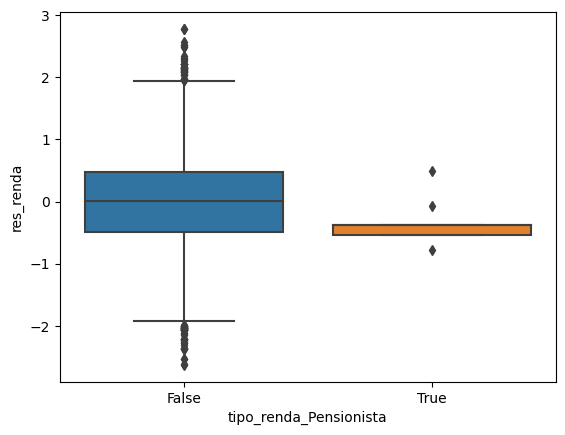

In [48]:
sns.boxplot(x = 'tipo_renda_Pensionista', y = 'res_renda', data = df_renda)

<Axes: xlabel='educacao_Superior_completo', ylabel='res_renda'>

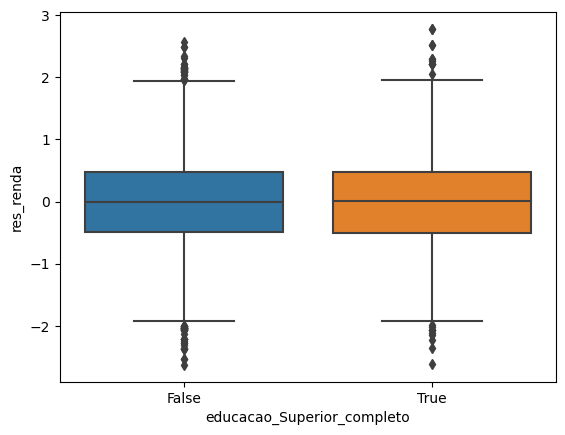

In [49]:
sns.boxplot(x = 'educacao_Superior_completo', y = 'res_renda', data = df_renda)

<Axes: xlabel='estado_civil', ylabel='res_renda'>

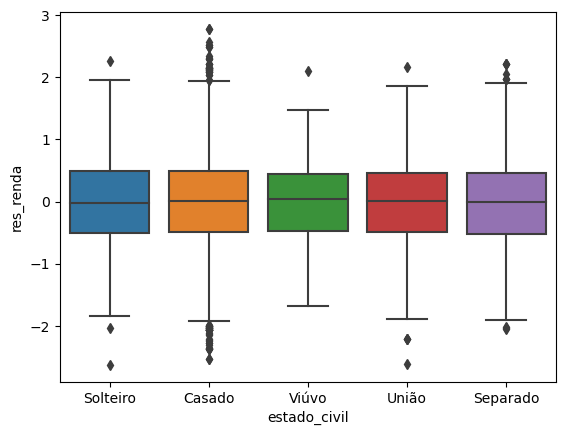

In [50]:
sns.boxplot(x = 'estado_civil', y = 'res_renda', data = df_renda)

**Avaliação da Qualidade dos Ajustes:**
* Com a aplicação do **logaritmo natural** para a variável resposta houve uma melhor distribuição dos resíduos em cada análise das variáveis explicativas;
* Foi aplicado o polinômio a variável explicativa **tempo_emprego** que obteve uma pequena melhora no $R^2$.